In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
import tensorflow as tf
import theano
import sklearn as sk
from theano import tensor
from theano import tensor
import statsmodels.formula.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from fuzzywuzzy import fuzz

import itertools









//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [2]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": {8,4}})

In [3]:
from IPython.core.display import HTML
css = open('/Users/doronsamuell/Desktop/style-table.css').read() + open('/Users/doronsamuell/Desktop/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
%%time
#load dataset
a = pd.read_csv("/Users/doronsamuell/Desktop/publicfinal_102015.csv", low_memory=False)
a = a.set_index(['CASEID'])

CPU times: user 23.7 s, sys: 2.78 s, total: 26.5 s
Wall time: 26.7 s


In [5]:
%%time
a

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


,maud5,pmaud5,lmaud5,opud5,popud5,lopud5,cocud5,pcocud5,lcocud5,sedud5,...,nnbs4,nnbs5,nnbs6,nnbs7,nnbs8,nnbpcs,nnbmcs,nurban,nregion,broadptsd
CASEID,,,,,,,,,,,,,,,,,,,,,
NHAS00000010,0,0,0,0,0,0,0,0,0,0,...,55.5,47.7,36.4,39.3,52.3,52.5,41.8,1,1,0
NHAS00000020,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,46.5,44.9,40.2,52.7,38.3,1,1,0
NHAS00000030,0,0,0,0,0,0,0,0,0,0,...,55.5,27.6,56.6,56.1,40.2,59.3,41.2,1,1,0
NHAS00000040,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,39.3,46.3,58.8,45.6,1,1,0
NHAS00000050,0,0,0,0,0,0,0,0,0,0,...,44.7,57.8,36.4,44.9,34.1,54.7,37.3,1,1,0
NHAS00000060,0,0,0,0,0,0,0,0,0,0,...,55.5,57.8,56.6,33.7,46.3,61.5,42.1,1,1,0
NHAS00000070,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,56.6,56.1,40.2,53.7,44.7,1,1,0
NHAS00000080,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,56.1,58.4,54.5,58.2,1,1,0
NHAS00000090,0,0,0,0,0,0,0,0,0,0,...,44.7,47.7,26.3,22.5,28.0,39.1,29.8,1,1,0


In [6]:
a.broadptsd.describe()

count    36309.000000
mean         0.112507
std          0.315993
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: broadptsd, dtype: float64

In [7]:
a.dtypes == 'object'

maud5        False
pmaud5       False
lmaud5       False
opud5        False
popud5       False
lopud5       False
cocud5       False
pcocud5      False
lcocud5      False
sedud5       False
psedud5      False
lsedud5      False
clbud5       False
pclbud5      False
lclbud5      False
solud5       False
psolud5      False
lsolud5      False
halud5       False
phalud5      False
lhalud5      False
stiud5       False
pstiud5      False
lstiud5      False
herud5       False
pherud5      False
lherud5      False
othud5       False
pothud5      False
lothud5      False
             ...  
n18q36r      False
n18q31r      False
n18q32r      False
n18q33ar     False
n18q35r      False
n18q33br     False
n18q34r      False
n1q18br      False
n1q19br      False
n1q20br      False
nethrace     False
n3aq3c35r    False
n3aq6c5r     False
VARUNIT      False
VARSTRAT     False
UATYPE       False
AUDWEIGHT    False
nnbs1        False
nnbs2        False
nnbs3        False
nnbs4        False
nnbs5       

In [8]:
all_names = a.dtypes

In [9]:
not_strings = all_names[all_names != "object"].index.values

In [10]:
print(not_strings)

['maud5' 'pmaud5' 'lmaud5' ..., 'nurban' 'nregion' 'broadptsd']


In [11]:
a = a[not_strings]

In [12]:
#described dataset
print(a.shape)

(36309, 4053)


In [13]:
#described the data
print(a.describe())

              maud5        pmaud5        lmaud5         opud5        popud5  \
count  36309.000000  36309.000000  36309.000000  36309.000000  36309.000000   
mean       0.026770      0.048142      0.061748      0.009089      0.013908   
std        0.161413      0.214070      0.240700      0.094902      0.117112   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             lopud5        cocud5       pcocud5       lcocud5        sedud5  \
count  36309.000000  36309.000000  36309.000000  36309.000000  36309.000000   
mean       0.018948      0.004186      0.022281      0.023989      0.003635   
std        0.136345      0.064567      0.147598    

In [14]:
#Foodstamps; missing = 0 i.e. not had foodstamps
a.N1F23B.fillna(0)

CASEID
NHAS00000010    0.0
NHAS00000020    0.0
NHAS00000030    0.0
NHAS00000040    0.0
NHAS00000050    0.0
NHAS00000060    0.0
NHAS00000070    0.0
NHAS00000080    0.0
NHAS00000090    0.0
NHAS00000100    0.0
NHAS00000110    0.0
NHAS00000120    0.0
NHAS00000130    0.0
NHAS00000140    0.0
NHAS00000150    1.0
NHAS00000160    0.0
NHAS00000170    0.0
NHAS00000180    0.0
NHAS00000190    0.0
NHAS00000200    0.0
NHAS00000210    0.0
NHAS00000220    0.0
NHAS00000230    0.0
NHAS00000240    0.0
NHAS00000250    0.0
NHAS00000260    0.0
NHAS00000270    0.0
NHAS00000280    0.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    0.0
NHAS01042500    0.0
NHAS01042510    0.0
NHAS01042520    0.0
NHAS01042530    0.0
NHAS01042540    0.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    1.0
NHAS01042580    0.0
NHAS01042590    0.0
NHAS01042600    0.0
NHAS01042610    0.0
NHAS01042620    0.0
NHAS01042630    0.0
NHAS01042640    0.0
NHAS01042650    0.0
NHAS01042660    0.0
NHAS01042670 

In [15]:
#new option for employment
a.N1F17C.fillna(3)

CASEID
NHAS00000010    0.0
NHAS00000020    3.0
NHAS00000030    1.0
NHAS00000040    3.0
NHAS00000050    3.0
NHAS00000060    0.0
NHAS00000070    0.0
NHAS00000080    0.0
NHAS00000090    3.0
NHAS00000100    0.0
NHAS00000110    0.0
NHAS00000120    0.0
NHAS00000130    3.0
NHAS00000140    0.0
NHAS00000150    0.0
NHAS00000160    3.0
NHAS00000170    0.0
NHAS00000180    0.0
NHAS00000190    0.0
NHAS00000200    0.0
NHAS00000210    0.0
NHAS00000220    3.0
NHAS00000230    0.0
NHAS00000240    0.0
NHAS00000250    0.0
NHAS00000260    0.0
NHAS00000270    3.0
NHAS00000280    0.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    0.0
NHAS01042500    0.0
NHAS01042510    0.0
NHAS01042520    0.0
NHAS01042530    0.0
NHAS01042540    0.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    0.0
NHAS01042580    0.0
NHAS01042590    0.0
NHAS01042600    0.0
NHAS01042610    0.0
NHAS01042620    0.0
NHAS01042630    0.0
NHAS01042640    0.0
NHAS01042650    0.0
NHAS01042660    0.0
NHAS01042670 

In [16]:
#another foodstamps input
a.N1F17B.fillna(3)

CASEID
NHAS00000010    0.0
NHAS00000020    3.0
NHAS00000030    1.0
NHAS00000040    3.0
NHAS00000050    3.0
NHAS00000060    0.0
NHAS00000070    0.0
NHAS00000080    0.0
NHAS00000090    3.0
NHAS00000100    0.0
NHAS00000110    0.0
NHAS00000120    0.0
NHAS00000130    3.0
NHAS00000140    0.0
NHAS00000150    0.0
NHAS00000160    3.0
NHAS00000170    0.0
NHAS00000180    0.0
NHAS00000190    0.0
NHAS00000200    0.0
NHAS00000210    0.0
NHAS00000220    3.0
NHAS00000230    0.0
NHAS00000240    0.0
NHAS00000250    0.0
NHAS00000260    0.0
NHAS00000270    3.0
NHAS00000280    0.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    0.0
NHAS01042500    0.0
NHAS01042510    0.0
NHAS01042520    0.0
NHAS01042530    0.0
NHAS01042540    0.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    0.0
NHAS01042580    0.0
NHAS01042590    0.0
NHAS01042600    0.0
NHAS01042610    0.0
NHAS01042620    0.0
NHAS01042630    0.0
NHAS01042640    0.0
NHAS01042650    0.0
NHAS01042660    0.0
NHAS01042670 

In [17]:
a

,maud5,pmaud5,lmaud5,opud5,popud5,lopud5,cocud5,pcocud5,lcocud5,sedud5,...,nnbs4,nnbs5,nnbs6,nnbs7,nnbs8,nnbpcs,nnbmcs,nurban,nregion,broadptsd
CASEID,,,,,,,,,,,,,,,,,,,,,
NHAS00000010,0,0,0,0,0,0,0,0,0,0,...,55.5,47.7,36.4,39.3,52.3,52.5,41.8,1,1,0
NHAS00000020,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,46.5,44.9,40.2,52.7,38.3,1,1,0
NHAS00000030,0,0,0,0,0,0,0,0,0,0,...,55.5,27.6,56.6,56.1,40.2,59.3,41.2,1,1,0
NHAS00000040,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,39.3,46.3,58.8,45.6,1,1,0
NHAS00000050,0,0,0,0,0,0,0,0,0,0,...,44.7,57.8,36.4,44.9,34.1,54.7,37.3,1,1,0
NHAS00000060,0,0,0,0,0,0,0,0,0,0,...,55.5,57.8,56.6,33.7,46.3,61.5,42.1,1,1,0
NHAS00000070,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,56.6,56.1,40.2,53.7,44.7,1,1,0
NHAS00000080,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,56.1,58.4,54.5,58.2,1,1,0
NHAS00000090,0,0,0,0,0,0,0,0,0,0,...,44.7,47.7,26.3,22.5,28.0,39.1,29.8,1,1,0


In [18]:
#another industry question
a.N1F17A.fillna(3)

CASEID
NHAS00000010    0.0
NHAS00000020    3.0
NHAS00000030    1.0
NHAS00000040    3.0
NHAS00000050    3.0
NHAS00000060    0.0
NHAS00000070    0.0
NHAS00000080    0.0
NHAS00000090    3.0
NHAS00000100    0.0
NHAS00000110    0.0
NHAS00000120    0.0
NHAS00000130    3.0
NHAS00000140    0.0
NHAS00000150    0.0
NHAS00000160    3.0
NHAS00000170    0.0
NHAS00000180    0.0
NHAS00000190    0.0
NHAS00000200    0.0
NHAS00000210    0.0
NHAS00000220    3.0
NHAS00000230    0.0
NHAS00000240    0.0
NHAS00000250    0.0
NHAS00000260    0.0
NHAS00000270    3.0
NHAS00000280    0.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    0.0
NHAS01042500    0.0
NHAS01042510    0.0
NHAS01042520    0.0
NHAS01042530    0.0
NHAS01042540    0.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    0.0
NHAS01042580    0.0
NHAS01042590    0.0
NHAS01042600    0.0
NHAS01042610    0.0
NHAS01042620    0.0
NHAS01042630    0.0
NHAS01042640    0.0
NHAS01042650    0.0
NHAS01042660    0.0
NHAS01042670 

In [19]:
#imputation concerning employment
a.N1f12b.fillna(3)

CASEID
NHAS00000010    3.0
NHAS00000020    3.0
NHAS00000030    3.0
NHAS00000040    3.0
NHAS00000050    0.0
NHAS00000060    3.0
NHAS00000070    3.0
NHAS00000080    3.0
NHAS00000090    3.0
NHAS00000100    3.0
NHAS00000110    3.0
NHAS00000120    3.0
NHAS00000130    3.0
NHAS00000140    3.0
NHAS00000150    0.0
NHAS00000160    0.0
NHAS00000170    3.0
NHAS00000180    3.0
NHAS00000190    3.0
NHAS00000200    3.0
NHAS00000210    3.0
NHAS00000220    3.0
NHAS00000230    3.0
NHAS00000240    3.0
NHAS00000250    3.0
NHAS00000260    3.0
NHAS00000270    3.0
NHAS00000280    3.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    3.0
NHAS01042500    0.0
NHAS01042510    3.0
NHAS01042520    3.0
NHAS01042530    0.0
NHAS01042540    3.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    3.0
NHAS01042580    3.0
NHAS01042590    3.0
NHAS01042600    3.0
NHAS01042610    0.0
NHAS01042620    3.0
NHAS01042630    0.0
NHAS01042640    3.0
NHAS01042650    3.0
NHAS01042660    0.0
NHAS01042670 

In [20]:
#0 = employed
a.N1q12br.fillna(0)

CASEID
NHAS00000010       0.0
NHAS00000020       0.0
NHAS00000030       0.0
NHAS00000040       0.0
NHAS00000050     104.0
NHAS00000060       0.0
NHAS00000070       0.0
NHAS00000080       0.0
NHAS00000090       0.0
NHAS00000100       0.0
NHAS00000110       0.0
NHAS00000120       0.0
NHAS00000130       0.0
NHAS00000140       0.0
NHAS00000150      52.0
NHAS00000160    1096.0
NHAS00000170       0.0
NHAS00000180       0.0
NHAS00000190       0.0
NHAS00000200       0.0
NHAS00000210       0.0
NHAS00000220       0.0
NHAS00000230       0.0
NHAS00000240       0.0
NHAS00000250       0.0
NHAS00000260       0.0
NHAS00000270       0.0
NHAS00000280       0.0
NHAS00000290       9.0
NHAS00000300       2.0
                 ...  
NHAS01042490       0.0
NHAS01042500     157.0
NHAS01042510       0.0
NHAS01042520       0.0
NHAS01042530       4.0
NHAS01042540       0.0
NHAS01042550      48.0
NHAS01042560     783.0
NHAS01042570       0.0
NHAS01042580       0.0
NHAS01042590       0.0
NHAS01042600       0.0
NHAS

In [21]:
#232 = born in the USA
a.N1Q2C.fillna(232)

CASEID
NHAS00000010     70.0
NHAS00000020     70.0
NHAS00000030    198.0
NHAS00000040    130.0
NHAS00000050    198.0
NHAS00000060    232.0
NHAS00000070    232.0
NHAS00000080    232.0
NHAS00000090    232.0
NHAS00000100    232.0
NHAS00000110    232.0
NHAS00000120    232.0
NHAS00000130    232.0
NHAS00000140    232.0
NHAS00000150    232.0
NHAS00000160    232.0
NHAS00000170    232.0
NHAS00000180    232.0
NHAS00000190    232.0
NHAS00000200     63.0
NHAS00000210    232.0
NHAS00000220    232.0
NHAS00000230    191.0
NHAS00000240    232.0
NHAS00000250    197.0
NHAS00000260    232.0
NHAS00000270    232.0
NHAS00000280    232.0
NHAS00000290    195.0
NHAS00000300    222.0
                ...  
NHAS01042490    232.0
NHAS01042500    232.0
NHAS01042510    232.0
NHAS01042520    232.0
NHAS01042530    232.0
NHAS01042540    232.0
NHAS01042550    232.0
NHAS01042560    232.0
NHAS01042570    232.0
NHAS01042580    232.0
NHAS01042590    232.0
NHAS01042600    232.0
NHAS01042610    232.0
NHAS01042620    232.0
NHA

In [22]:
#123 = born in the USA
a.N1f12b.fillna(120)

CASEID
NHAS00000010    120.0
NHAS00000020    120.0
NHAS00000030    120.0
NHAS00000040    120.0
NHAS00000050      0.0
NHAS00000060    120.0
NHAS00000070    120.0
NHAS00000080    120.0
NHAS00000090    120.0
NHAS00000100    120.0
NHAS00000110    120.0
NHAS00000120    120.0
NHAS00000130    120.0
NHAS00000140    120.0
NHAS00000150      0.0
NHAS00000160      0.0
NHAS00000170    120.0
NHAS00000180    120.0
NHAS00000190    120.0
NHAS00000200    120.0
NHAS00000210    120.0
NHAS00000220    120.0
NHAS00000230    120.0
NHAS00000240    120.0
NHAS00000250    120.0
NHAS00000260    120.0
NHAS00000270    120.0
NHAS00000280    120.0
NHAS00000290      0.0
NHAS00000300      0.0
                ...  
NHAS01042490    120.0
NHAS01042500      0.0
NHAS01042510    120.0
NHAS01042520    120.0
NHAS01042530      0.0
NHAS01042540    120.0
NHAS01042550      0.0
NHAS01042560      0.0
NHAS01042570    120.0
NHAS01042580    120.0
NHAS01042590    120.0
NHAS01042600    120.0
NHAS01042610      0.0
NHAS01042620    120.0
NHA

In [23]:
#10= lived with biological parents before 18
a.N1Q7C1.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230     2.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560     1.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [24]:
#10 = raised by biological parents before 18
a.N1Q7C2.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230     1.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560     2.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [25]:
#10 = lived with biological parents before 18
a.N1Q7C3.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230     2.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560     2.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [26]:
#10 = not raised in an institution before 18
a.N1Q7C4.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230     2.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560     2.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [27]:
#10 = Lived with biological parents before 18
a.N1Q7C5.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230     2.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560     2.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [28]:
#10 = Unknown if lived with biological parents before 18
a.n1q8a.fillna(10)

CASEID
NHAS00000010     2.0
NHAS00000020     2.0
NHAS00000030    10.0
NHAS00000040     2.0
NHAS00000050     2.0
NHAS00000060     2.0
NHAS00000070     2.0
NHAS00000080     1.0
NHAS00000090     2.0
NHAS00000100     2.0
NHAS00000110     1.0
NHAS00000120     2.0
NHAS00000130    10.0
NHAS00000140     2.0
NHAS00000150     1.0
NHAS00000160    10.0
NHAS00000170     2.0
NHAS00000180     1.0
NHAS00000190     2.0
NHAS00000200     2.0
NHAS00000210     2.0
NHAS00000220    10.0
NHAS00000230    10.0
NHAS00000240     1.0
NHAS00000250     2.0
NHAS00000260     2.0
NHAS00000270    10.0
NHAS00000280     2.0
NHAS00000290     2.0
NHAS00000300     2.0
                ... 
NHAS01042490     2.0
NHAS01042500     2.0
NHAS01042510     2.0
NHAS01042520     2.0
NHAS01042530     2.0
NHAS01042540     2.0
NHAS01042550     2.0
NHAS01042560     2.0
NHAS01042570     2.0
NHAS01042580     2.0
NHAS01042590     1.0
NHAS01042600     2.0
NHAS01042610     2.0
NHAS01042620    10.0
NHAS01042630     1.0
NHAS01042640     2.0
NHAS01

In [29]:
#40 = Did not experience divorce of biological parents before 18
a.n1q8b.fillna(40)

CASEID
NHAS00000010    40.0
NHAS00000020    40.0
NHAS00000030    40.0
NHAS00000040    40.0
NHAS00000050    40.0
NHAS00000060    40.0
NHAS00000070    40.0
NHAS00000080     6.0
NHAS00000090    40.0
NHAS00000100    40.0
NHAS00000110    12.0
NHAS00000120    40.0
NHAS00000130    40.0
NHAS00000140    40.0
NHAS00000150    17.0
NHAS00000160    40.0
NHAS00000170    40.0
NHAS00000180     3.0
NHAS00000190    40.0
NHAS00000200    40.0
NHAS00000210    40.0
NHAS00000220    40.0
NHAS00000230    40.0
NHAS00000240     2.0
NHAS00000250    40.0
NHAS00000260    40.0
NHAS00000270    40.0
NHAS00000280    40.0
NHAS00000290    40.0
NHAS00000300    40.0
                ... 
NHAS01042490    40.0
NHAS01042500    40.0
NHAS01042510    40.0
NHAS01042520    40.0
NHAS01042530    40.0
NHAS01042540    40.0
NHAS01042550    40.0
NHAS01042560    40.0
NHAS01042570    40.0
NHAS01042580    40.0
NHAS01042590     4.0
NHAS01042600    40.0
NHAS01042610    40.0
NHAS01042620    40.0
NHAS01042630    11.0
NHAS01042640    40.0
NHAS01

In [30]:
#10 = Parents did not experience divorce
a.n1q8c.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080     3.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110     1.0
NHAS00000120    10.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150     1.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180     1.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220    10.0
NHAS00000230    10.0
NHAS00000240     1.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280    10.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490    10.0
NHAS01042500    10.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560    10.0
NHAS01042570    10.0
NHAS01042580    10.0
NHAS01042590     1.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630     2.0
NHAS01042640    10.0
NHAS01

In [31]:
#10 = unknown if lived with father before 18
a.n1q7b.fillna(10)

CASEID
NHAS00000010     1.0
NHAS00000020     1.0
NHAS00000030     2.0
NHAS00000040     1.0
NHAS00000050     1.0
NHAS00000060     1.0
NHAS00000070     1.0
NHAS00000080     1.0
NHAS00000090     1.0
NHAS00000100     1.0
NHAS00000110     1.0
NHAS00000120     1.0
NHAS00000130     2.0
NHAS00000140     1.0
NHAS00000150     1.0
NHAS00000160     2.0
NHAS00000170     1.0
NHAS00000180     1.0
NHAS00000190     1.0
NHAS00000200     1.0
NHAS00000210     1.0
NHAS00000220     2.0
NHAS00000230    10.0
NHAS00000240     1.0
NHAS00000250     1.0
NHAS00000260     1.0
NHAS00000270     2.0
NHAS00000280     1.0
NHAS00000290     1.0
NHAS00000300     1.0
                ... 
NHAS01042490     1.0
NHAS01042500     1.0
NHAS01042510     1.0
NHAS01042520     1.0
NHAS01042530     1.0
NHAS01042540     1.0
NHAS01042550     1.0
NHAS01042560    10.0
NHAS01042570     1.0
NHAS01042580     1.0
NHAS01042590     1.0
NHAS01042600     1.0
NHAS01042610     1.0
NHAS01042620     2.0
NHAS01042630     1.0
NHAS01042640     1.0
NHAS01

In [32]:
#10 = unknown if lived with biological parent before 18
a.n1q8h.fillna(10)

CASEID
NHAS00000010     2.0
NHAS00000020     1.0
NHAS00000030     1.0
NHAS00000040     2.0
NHAS00000050     2.0
NHAS00000060     2.0
NHAS00000070     2.0
NHAS00000080     2.0
NHAS00000090     2.0
NHAS00000100     2.0
NHAS00000110     2.0
NHAS00000120     2.0
NHAS00000130     2.0
NHAS00000140     2.0
NHAS00000150     2.0
NHAS00000160     2.0
NHAS00000170     2.0
NHAS00000180     2.0
NHAS00000190     2.0
NHAS00000200     2.0
NHAS00000210     2.0
NHAS00000220     1.0
NHAS00000230    10.0
NHAS00000240     2.0
NHAS00000250     2.0
NHAS00000260     2.0
NHAS00000270     1.0
NHAS00000280     2.0
NHAS00000290     2.0
NHAS00000300     2.0
                ... 
NHAS01042490     2.0
NHAS01042500     2.0
NHAS01042510     2.0
NHAS01042520     1.0
NHAS01042530     2.0
NHAS01042540     2.0
NHAS01042550     2.0
NHAS01042560     2.0
NHAS01042570     2.0
NHAS01042580     2.0
NHAS01042590     2.0
NHAS01042600     2.0
NHAS01042610     2.0
NHAS01042620     2.0
NHAS01042630     2.0
NHAS01042640     2.0
NHAS01

In [33]:
#120 = did not or unknown if experienced death of a biological parent before 18
a.n1q8i.fillna(120)

CASEID
NHAS00000010    120.0
NHAS00000020     12.0
NHAS00000030      6.0
NHAS00000040    120.0
NHAS00000050    120.0
NHAS00000060    120.0
NHAS00000070    120.0
NHAS00000080    120.0
NHAS00000090    120.0
NHAS00000100    120.0
NHAS00000110    120.0
NHAS00000120    120.0
NHAS00000130    120.0
NHAS00000140    120.0
NHAS00000150    120.0
NHAS00000160    120.0
NHAS00000170    120.0
NHAS00000180    120.0
NHAS00000190    120.0
NHAS00000200    120.0
NHAS00000210    120.0
NHAS00000220     12.0
NHAS00000230    120.0
NHAS00000240    120.0
NHAS00000250    120.0
NHAS00000260    120.0
NHAS00000270     11.0
NHAS00000280    120.0
NHAS00000290    120.0
NHAS00000300    120.0
                ...  
NHAS01042490    120.0
NHAS01042500    120.0
NHAS01042510    120.0
NHAS01042520     17.0
NHAS01042530    120.0
NHAS01042540    120.0
NHAS01042550    120.0
NHAS01042560    120.0
NHAS01042570    120.0
NHAS01042580    120.0
NHAS01042590    120.0
NHAS01042600    120.0
NHAS01042610    120.0
NHAS01042620    120.0
NHA

In [34]:
#200 = never married
a.n1q10A.fillna(200)

CASEID
NHAS00000010     27.0
NHAS00000020     23.0
NHAS00000030     23.0
NHAS00000040    200.0
NHAS00000050     26.0
NHAS00000060    200.0
NHAS00000070     26.0
NHAS00000080     21.0
NHAS00000090     25.0
NHAS00000100    200.0
NHAS00000110     20.0
NHAS00000120     23.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     18.0
NHAS00000170     25.0
NHAS00000180    200.0
NHAS00000190     22.0
NHAS00000200     28.0
NHAS00000210     20.0
NHAS00000220     19.0
NHAS00000230     34.0
NHAS00000240     21.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280     30.0
NHAS00000290     14.0
NHAS00000300    200.0
                ...  
NHAS01042490     21.0
NHAS01042500     19.0
NHAS01042510     18.0
NHAS01042520     23.0
NHAS01042530     21.0
NHAS01042540     16.0
NHAS01042550     25.0
NHAS01042560     18.0
NHAS01042570     22.0
NHAS01042580     24.0
NHAS01042590     25.0
NHAS01042600     27.0
NHAS01042610     39.0
NHAS01042620    200.0
NHA

In [35]:
#10 = never married or still married
a.n1q10B.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030     3.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090    10.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120     3.0
NHAS00000130    10.0
NHAS00000140    10.0
NHAS00000150    10.0
NHAS00000160    10.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210     3.0
NHAS00000220     1.0
NHAS00000230     3.0
NHAS00000240     3.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270    10.0
NHAS00000280     1.0
NHAS00000290     3.0
NHAS00000300    10.0
                ... 
NHAS01042490     3.0
NHAS01042500     1.0
NHAS01042510    10.0
NHAS01042520    10.0
NHAS01042530     3.0
NHAS01042540     3.0
NHAS01042550     3.0
NHAS01042560     3.0
NHAS01042570     3.0
NHAS01042580    10.0
NHAS01042590     3.0
NHAS01042600     3.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630    10.0
NHAS01042640    10.0
NHAS01

In [36]:
#200 = never married or first spouse alive
a.n1q10C.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030     38.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     75.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210     99.0
NHAS00000220     49.0
NHAS00000230     52.0
NHAS00000240     35.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280     51.0
NHAS00000290     15.0
NHAS00000300    200.0
                ...  
NHAS01042490     34.0
NHAS01042500     28.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530     26.0
NHAS01042540     99.0
NHAS01042550     33.0
NHAS01042560     34.0
NHAS01042570     27.0
NHAS01042580    200.0
NHAS01042590     27.0
NHAS01042600     40.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [37]:
#200 = not currently married
a.n1q10D.fillna(200)

CASEID
NHAS00000010     27.0
NHAS00000020     23.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050     26.0
NHAS00000060    200.0
NHAS00000070     26.0
NHAS00000080     21.0
NHAS00000090     25.0
NHAS00000100    200.0
NHAS00000110     20.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     18.0
NHAS00000170     25.0
NHAS00000180    200.0
NHAS00000190     22.0
NHAS00000200     28.0
NHAS00000210     20.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290     26.0
NHAS00000300    200.0
                ...  
NHAS01042490     39.0
NHAS01042500    200.0
NHAS01042510     18.0
NHAS01042520     23.0
NHAS01042530     53.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560     34.0
NHAS01042570    200.0
NHAS01042580     24.0
NHAS01042590    200.0
NHAS01042600    200.0
NHAS01042610     39.0
NHAS01042620    200.0
NHA

In [38]:
#200 = unkmnown or does not have children
a.n1q11b.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020     25.0
NHAS00000030     19.0
NHAS00000040    200.0
NHAS00000050     25.0
NHAS00000060    200.0
NHAS00000070     39.0
NHAS00000080     21.0
NHAS00000090     29.0
NHAS00000100    200.0
NHAS00000110     29.0
NHAS00000120     27.0
NHAS00000130     18.0
NHAS00000140     20.0
NHAS00000150     21.0
NHAS00000160     15.0
NHAS00000170     27.0
NHAS00000180    200.0
NHAS00000190     28.0
NHAS00000200     30.0
NHAS00000210     17.0
NHAS00000220     23.0
NHAS00000230     28.0
NHAS00000240    200.0
NHAS00000250     24.0
NHAS00000260    200.0
NHAS00000270     20.0
NHAS00000280    200.0
NHAS00000290     15.0
NHAS00000300     26.0
                ...  
NHAS01042490     23.0
NHAS01042500    200.0
NHAS01042510     21.0
NHAS01042520     26.0
NHAS01042530     29.0
NHAS01042540     18.0
NHAS01042550     26.0
NHAS01042560     21.0
NHAS01042570     25.0
NHAS01042580     25.0
NHAS01042590    200.0
NHAS01042600     27.0
NHAS01042610     24.0
NHAS01042620    200.0
NHA

In [39]:
#200 = unkmnown or does not have children
a.n1q11c.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020     30.0
NHAS00000030     27.0
NHAS00000040    200.0
NHAS00000050     25.0
NHAS00000060    200.0
NHAS00000070     39.0
NHAS00000080     26.0
NHAS00000090     35.0
NHAS00000100    200.0
NHAS00000110     31.0
NHAS00000120     33.0
NHAS00000130     30.0
NHAS00000140     30.0
NHAS00000150     35.0
NHAS00000160     20.0
NHAS00000170     33.0
NHAS00000180    200.0
NHAS00000190     30.0
NHAS00000200     36.0
NHAS00000210     25.0
NHAS00000220     42.0
NHAS00000230     36.0
NHAS00000240    200.0
NHAS00000250     26.0
NHAS00000260    200.0
NHAS00000270     32.0
NHAS00000280    200.0
NHAS00000290     28.0
NHAS00000300     26.0
                ...  
NHAS01042490     31.0
NHAS01042500    200.0
NHAS01042510     32.0
NHAS01042520     28.0
NHAS01042530     38.0
NHAS01042540     40.0
NHAS01042550     38.0
NHAS01042560     24.0
NHAS01042570     27.0
NHAS01042580     29.0
NHAS01042590    200.0
NHAS01042600     27.0
NHAS01042610     24.0
NHAS01042620    200.0
NHA

In [40]:
#200 = never served active duty in the US
a.N1Q15B1.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [41]:
#200 = never served active duty in the US
a.N1Q15B2.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [42]:
#200 = never served active duty in the US
a.N1Q15B3.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [43]:
#200 = never served active duty in the US
a.N1Q15B4.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [44]:
#200 = never served active duty in the US
a.N1Q15B5.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [45]:
#200 = never served active duty in the US
a.N1Q15B6.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [46]:
#200 = never served active duty in the US
a.N1Q15B7.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [47]:
#200 = never served active duty in the US
a.N1Q15B8.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      1.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      1.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      1.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [48]:
#200 = never served active duty in the US
a.N1Q15B9.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [49]:
#200 = never served active duty in the US
a.N1Q15B10.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [50]:
#200 = never served active duty in the US
a.N1Q15B11.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [51]:
#200 = never served active duty in the US
a.N1Q15B12.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [52]:
#200 = never served active duty in the US
a.N1Q15B13.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [53]:
#200 = never served active duty in the US
a.N1Q15B14.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090      2.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [54]:
#200 = never worked for pay in family business or farm
a.n1q16c.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     85.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150     45.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280     52.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490     63.0
NHAS01042500     54.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540     99.0
NHAS01042550    200.0
NHAS01042560     43.0
NHAS01042570    200.0
NHAS01042580     65.0
NHAS01042590    200.0
NHAS01042600     54.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [55]:
#200 = never worked for pay or in family business or farm
a.n1q16d.fillna(200)

CASEID
NHAS00000010     24.0
NHAS00000020    200.0
NHAS00000030     99.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     19.0
NHAS00000070     21.0
NHAS00000080     18.0
NHAS00000090    200.0
NHAS00000100     15.0
NHAS00000110     17.0
NHAS00000120     17.0
NHAS00000130    200.0
NHAS00000140     20.0
NHAS00000150     18.0
NHAS00000160    200.0
NHAS00000170      7.0
NHAS00000180      0.0
NHAS00000190     18.0
NHAS00000200     24.0
NHAS00000210     14.0
NHAS00000220    200.0
NHAS00000230     18.0
NHAS00000240     18.0
NHAS00000250     10.0
NHAS00000260     17.0
NHAS00000270    200.0
NHAS00000280     21.0
NHAS00000290     23.0
NHAS00000300     18.0
                ...  
NHAS01042490     18.0
NHAS01042500     19.0
NHAS01042510     18.0
NHAS01042520     10.0
NHAS01042530     21.0
NHAS01042540     99.0
NHAS01042550     16.0
NHAS01042560     18.0
NHAS01042570     19.0
NHAS01042580     17.0
NHAS01042590     18.0
NHAS01042600     24.0
NHAS01042610     19.0
NHAS01042620     18.0
NHA

In [56]:
#200 = never worked for pay or in family business or farm
a.n1q17a.fillna(200)

CASEID
NHAS00000010      9.0
NHAS00000020    200.0
NHAS00000030      1.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     13.0
NHAS00000080      8.0
NHAS00000090    200.0
NHAS00000100      7.0
NHAS00000110     12.0
NHAS00000120      7.0
NHAS00000130    200.0
NHAS00000140      3.0
NHAS00000150     12.0
NHAS00000160    200.0
NHAS00000170     11.0
NHAS00000180      7.0
NHAS00000190     12.0
NHAS00000200     12.0
NHAS00000210     12.0
NHAS00000220    200.0
NHAS00000230      7.0
NHAS00000240      5.0
NHAS00000250      3.0
NHAS00000260     11.0
NHAS00000270    200.0
NHAS00000280     13.0
NHAS00000290      4.0
NHAS00000300     10.0
                ...  
NHAS01042490      5.0
NHAS01042500     10.0
NHAS01042510     12.0
NHAS01042520      1.0
NHAS01042530      9.0
NHAS01042540     12.0
NHAS01042550      7.0
NHAS01042560     12.0
NHAS01042570     10.0
NHAS01042580      1.0
NHAS01042590     14.0
NHAS01042600      4.0
NHAS01042610     12.0
NHAS01042620      4.0
NHA

In [57]:
#200 = never worked for pay or in family business or farm
a.n1q17b.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020    200.0
NHAS00000030      8.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     13.0
NHAS00000070      8.0
NHAS00000080      1.0
NHAS00000090    200.0
NHAS00000100      8.0
NHAS00000110      8.0
NHAS00000120      4.0
NHAS00000130    200.0
NHAS00000140     11.0
NHAS00000150      1.0
NHAS00000160    200.0
NHAS00000170      8.0
NHAS00000180      8.0
NHAS00000190      5.0
NHAS00000200      3.0
NHAS00000210      1.0
NHAS00000220    200.0
NHAS00000230      4.0
NHAS00000240      5.0
NHAS00000250     10.0
NHAS00000260      2.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290     11.0
NHAS00000300      5.0
                ...  
NHAS01042490     12.0
NHAS01042500     11.0
NHAS01042510      5.0
NHAS01042520      9.0
NHAS01042530      4.0
NHAS01042540      2.0
NHAS01042550      4.0
NHAS01042560      7.0
NHAS01042570      6.0
NHAS01042580      9.0
NHAS01042590     14.0
NHAS01042600      2.0
NHAS01042610      3.0
NHAS01042620     11.0
NHA

In [58]:
#10 = never worked for pay or in family business or farm
a.n1q17c.fillna(10)

CASEID
NHAS00000010     1.0
NHAS00000020    10.0
NHAS00000030     7.0
NHAS00000040    10.0
NHAS00000050    10.0
NHAS00000060     2.0
NHAS00000070     4.0
NHAS00000080     1.0
NHAS00000090    10.0
NHAS00000100     1.0
NHAS00000110     2.0
NHAS00000120     1.0
NHAS00000130    10.0
NHAS00000140     8.0
NHAS00000150     2.0
NHAS00000160    10.0
NHAS00000170     8.0
NHAS00000180     1.0
NHAS00000190     8.0
NHAS00000200     1.0
NHAS00000210     1.0
NHAS00000220    10.0
NHAS00000230     1.0
NHAS00000240     1.0
NHAS00000250     1.0
NHAS00000260     1.0
NHAS00000270    10.0
NHAS00000280     4.0
NHAS00000290     1.0
NHAS00000300     1.0
                ... 
NHAS01042490     1.0
NHAS01042500     1.0
NHAS01042510     2.0
NHAS01042520     8.0
NHAS01042530     1.0
NHAS01042540     1.0
NHAS01042550     1.0
NHAS01042560     1.0
NHAS01042570     8.0
NHAS01042580     8.0
NHAS01042590     1.0
NHAS01042600     1.0
NHAS01042610     2.0
NHAS01042620     1.0
NHAS01042630     1.0
NHAS01042640     2.0
NHAS01

In [59]:
#200 unknown or never received govt assistance
a.N1Q21B.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070      1.0
NHAS00000080     99.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130     99.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180      3.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270     99.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [60]:
#10 = Not covered or unknown if covered by Medicare(US)
a.N1Q24B.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030    10.0
NHAS00000040     3.0
NHAS00000050     3.0
NHAS00000060    10.0
NHAS00000070    10.0
NHAS00000080    10.0
NHAS00000090     3.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120     3.0
NHAS00000130     9.0
NHAS00000140    10.0
NHAS00000150     3.0
NHAS00000160     1.0
NHAS00000170    10.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200    10.0
NHAS00000210    10.0
NHAS00000220     2.0
NHAS00000230    10.0
NHAS00000240    10.0
NHAS00000250    10.0
NHAS00000260    10.0
NHAS00000270     1.0
NHAS00000280     3.0
NHAS00000290    10.0
NHAS00000300    10.0
                ... 
NHAS01042490     3.0
NHAS01042500     3.0
NHAS01042510     3.0
NHAS01042520    10.0
NHAS01042530    10.0
NHAS01042540     3.0
NHAS01042550    10.0
NHAS01042560    10.0
NHAS01042570    10.0
NHAS01042580     3.0
NHAS01042590    10.0
NHAS01042600     3.0
NHAS01042610    10.0
NHAS01042620    10.0
NHAS01042630     9.0
NHAS01042640    10.0
NHAS01

In [61]:
#10 = Unknown or does not attend religious services
a.n1q37b.fillna(10)

CASEID
NHAS00000010    10.0
NHAS00000020    10.0
NHAS00000030     5.0
NHAS00000040     2.0
NHAS00000050    10.0
NHAS00000060    10.0
NHAS00000070     3.0
NHAS00000080    10.0
NHAS00000090     2.0
NHAS00000100    10.0
NHAS00000110    10.0
NHAS00000120     3.0
NHAS00000130     2.0
NHAS00000140    10.0
NHAS00000150     3.0
NHAS00000160    10.0
NHAS00000170     4.0
NHAS00000180    10.0
NHAS00000190    10.0
NHAS00000200     4.0
NHAS00000210     2.0
NHAS00000220     3.0
NHAS00000230    10.0
NHAS00000240    10.0
NHAS00000250     5.0
NHAS00000260     5.0
NHAS00000270    10.0
NHAS00000280     4.0
NHAS00000290     5.0
NHAS00000300     4.0
                ... 
NHAS01042490    10.0
NHAS01042500     4.0
NHAS01042510     4.0
NHAS01042520     4.0
NHAS01042530    10.0
NHAS01042540    10.0
NHAS01042550    10.0
NHAS01042560    10.0
NHAS01042570     4.0
NHAS01042580     4.0
NHAS01042590    10.0
NHAS01042600    10.0
NHAS01042610    10.0
NHAS01042620     3.0
NHAS01042630    10.0
NHAS01042640     3.0
NHAS01

In [62]:
#200 = Unknown or does not attend religious services
a.n1q37c.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030      1.0
NHAS00000040      0.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070      0.0
NHAS00000080    200.0
NHAS00000090     99.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130      0.0
NHAS00000140    200.0
NHAS00000150      4.0
NHAS00000160    200.0
NHAS00000170      7.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200      5.0
NHAS00000210      0.0
NHAS00000220      2.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      3.0
NHAS00000260     50.0
NHAS00000270    200.0
NHAS00000280     50.0
NHAS00000290     15.0
NHAS00000300      0.0
                ...  
NHAS01042490    200.0
NHAS01042500      4.0
NHAS01042510     12.0
NHAS01042520     20.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     10.0
NHAS01042580      3.0
NHAS01042590    200.0
NHAS01042600    200.0
NHAS01042610    200.0
NHAS01042620      4.0
NHA

In [63]:
#200 = Former drinker or lifetime abstainer
a.n2aq4a.fillna(200)

CASEID
NHAS00000010     99.0
NHAS00000020      5.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      5.0
NHAS00000070      4.0
NHAS00000080      6.0
NHAS00000090      5.0
NHAS00000100      5.0
NHAS00000110    200.0
NHAS00000120      5.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      9.0
NHAS00000170      4.0
NHAS00000180      9.0
NHAS00000190      6.0
NHAS00000200      6.0
NHAS00000210      9.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      5.0
NHAS00000260      3.0
NHAS00000270      4.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      5.0
NHAS01042500    200.0
NHAS01042510      8.0
NHAS01042520      8.0
NHAS01042530      6.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      9.0
NHAS01042580    200.0
NHAS01042590     10.0
NHAS01042600      1.0
NHAS01042610      8.0
NHAS01042620      3.0
NHA

In [64]:
#200 = Former drinker or lifetime abstainer
a.n2aq4b.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      3.0
NHAS00000070      1.0
NHAS00000080      2.0
NHAS00000090      1.0
NHAS00000100      3.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130     24.0
NHAS00000140     12.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170      1.0
NHAS00000180      3.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210      3.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      7.0
NHAS00000260      7.0
NHAS00000270      2.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      1.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      1.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      5.0
NHAS01042610      3.0
NHAS01042620      1.0
NHA

In [65]:
#200 former drinker or lifetime abstainer
a.n2aq4c.fillna(200)

CASEID
NHAS00000010      3.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070      3.0
NHAS00000080      7.0
NHAS00000090      1.0
NHAS00000100      7.0
NHAS00000110    200.0
NHAS00000120      3.0
NHAS00000130     24.0
NHAS00000140     24.0
NHAS00000150    200.0
NHAS00000160     17.0
NHAS00000170      4.0
NHAS00000180      7.0
NHAS00000190      2.0
NHAS00000200      2.0
NHAS00000210      4.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250     15.0
NHAS00000260     23.0
NHAS00000270      4.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      3.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      2.0
NHAS01042530      4.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      6.0
NHAS01042610      5.0
NHAS01042620      3.0
NHA

In [66]:
#BL. NA, former drinker or lifetime abstainer or exact largest number provided
a.n2aq4d.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600    200.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [67]:
#200 = former drinker or lifetime abstainer
a.n2aq4e.fillna(200)

CASEID
NHAS00000010      6.0
NHAS00000020      5.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070      9.0
NHAS00000080     10.0
NHAS00000090      5.0
NHAS00000100     10.0
NHAS00000110    200.0
NHAS00000120     10.0
NHAS00000130      1.0
NHAS00000140      3.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170     10.0
NHAS00000180     10.0
NHAS00000190     10.0
NHAS00000200      9.0
NHAS00000210      9.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260      9.0
NHAS00000270      9.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490     10.0
NHAS01042500    200.0
NHAS01042510      8.0
NHAS01042520     10.0
NHAS01042530     10.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      9.0
NHAS01042580    200.0
NHAS01042590     10.0
NHAS01042600      3.0
NHAS01042610     10.0
NHAS01042620      5.0
NHA

In [68]:
#200 BL. NA, former drinker or lifetime abstainer or male less than 65 years old
a.n2aq4f.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160      9.0
NHAS00000170     10.0
NHAS00000180      9.0
NHAS00000190     11.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270      9.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610     10.0
NHAS01042620    200.0
NHA

In [69]:
#200 BL. NA, former drinker or lifetime abstainer or male less than 65 years old
a.n2aq4g.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600     11.0
NHAS01042610     10.0
NHAS01042620    200.0
NHA

In [70]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq4h.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070     11.0
NHAS00000080     10.0
NHAS00000090     11.0
NHAS00000100      9.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      9.0
NHAS00000170     11.0
NHAS00000180     10.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      5.0
NHAS00000260      3.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600      2.0
NHAS01042610     10.0
NHAS01042620     11.0
NHA

In [71]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq4i.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     11.0
NHAS00000080     11.0
NHAS00000090     11.0
NHAS00000100     11.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      3.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      5.0
NHAS00000260      4.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600     11.0
NHAS01042610     11.0
NHAS01042620     11.0
NHA

In [72]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq4j.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     11.0
NHAS00000080     11.0
NHAS00000090     11.0
NHAS00000100     11.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      9.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      7.0
NHAS00000260      8.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600     11.0
NHAS01042610     11.0
NHAS01042620     11.0
NHA

In [73]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq4k.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     11.0
NHAS00000080     11.0
NHAS00000090     11.0
NHAS00000100     11.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260      9.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600     11.0
NHAS01042610     11.0
NHAS01042620     11.0
NHA

In [74]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq5a.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      2.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      2.0
NHAS00000140      2.0
NHAS00000150    200.0
NHAS00000160      2.0
NHAS00000170      2.0
NHAS00000180      2.0
NHAS00000190      1.0
NHAS00000200      2.0
NHAS00000210      2.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260      1.0
NHAS00000270      2.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      2.0
NHA

In [75]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq5b.fillna(200)


CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      8.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     10.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190      9.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      3.0
NHAS00000270    200.0
NHAS00000280      6.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      2.0
NHAS01042610      9.0
NHAS01042620    200.0
NHA

In [76]:
#200 BL. NA, former drinker or lifetime abstainer
a.n2aq5d.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      3.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190      1.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      6.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      5.0
NHAS01042610      3.0
NHAS01042620    200.0
NHA

In [77]:
#BL. NA, did not drink or unknown if drank coolers in last 12 months
a.n2aq5e.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190      2.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      6.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      6.0
NHAS01042610      3.0
NHAS01042620    200.0
NHA

In [78]:
#BL. NA, did not drink or unknown if drank coolers in last 12 months
a.n2aq5f.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      9.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     10.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190     10.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      3.0
NHAS00000270    200.0
NHAS00000280      6.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      3.0
NHAS01042610      9.0
NHAS01042620    200.0
NHA

In [79]:
#BL. NA, did not drink or unknown if drank coolers in last 12 months
a.n2aq5g.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      9.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190     11.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      3.0
NHAS00000270    200.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      2.0
NHAS01042610     11.0
NHAS01042620    200.0
NHA

In [80]:
#BL. NA, did not drink or unknown if drank coolers in last 12 months
a.n2aq5h.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      6.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190      1.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      5.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      6.0
NHAS01042610      6.0
NHAS01042620    200.0
NHA

In [81]:
#BL. NA, did not drink or unknown if drank coolers in last 12 months
a.n2aq5i.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190      2.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      2.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      2.0
NHAS01042620    200.0
NHA

In [82]:
#200 Former drinker or lifetimes abstainer
a.n2aq6a.fillna(200)

CASEID
NHAS00000010      1.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      1.0
NHAS00000090      2.0
NHAS00000100      1.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      2.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      2.0
NHAS00000200      1.0
NHAS00000210      1.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      1.0
NHAS00000260      2.0
NHAS00000270      2.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      1.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      1.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610      2.0
NHAS01042620      1.0
NHA

In [83]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6b.fillna(200)

CASEID
NHAS00000010      9.0
NHAS00000020      5.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     10.0
NHAS00000070      4.0
NHAS00000080      7.0
NHAS00000090    200.0
NHAS00000100      5.0
NHAS00000110    200.0
NHAS00000120      7.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      9.0
NHAS00000180      9.0
NHAS00000190    200.0
NHAS00000200     10.0
NHAS00000210      9.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      6.0
NHAS00000290    200.0
NHAS00000300      9.0
                ...  
NHAS01042490      5.0
NHAS01042500    200.0
NHAS01042510      9.0
NHAS01042520      8.0
NHAS01042530      6.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590     10.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      3.0
NHA

In [84]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6d.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      2.0
NHAS00000090    200.0
NHAS00000100      3.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130     24.0
NHAS00000140      6.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      1.0
NHAS00000180      3.0
NHAS00000190    200.0
NHAS00000200      1.0
NHAS00000210      3.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      6.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      1.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      1.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      1.0
NHA

In [85]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6e.fillna(200)

CASEID
NHAS00000010      3.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      3.0
NHAS00000080      3.0
NHAS00000090    200.0
NHAS00000100      6.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130     24.0
NHAS00000140      9.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      3.0
NHAS00000180      7.0
NHAS00000190    200.0
NHAS00000200      1.0
NHAS00000210      4.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      6.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      3.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      2.0
NHAS01042530      4.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      3.0
NHA

In [86]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6f.fillna(200)

CASEID
NHAS00000010      9.0
NHAS00000020      5.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     10.0
NHAS00000070      9.0
NHAS00000080     10.0
NHAS00000090    200.0
NHAS00000100     10.0
NHAS00000110    200.0
NHAS00000120      8.0
NHAS00000130      2.0
NHAS00000140      4.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170     10.0
NHAS00000180     10.0
NHAS00000190    200.0
NHAS00000200     10.0
NHAS00000210      9.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      6.0
NHAS00000290    200.0
NHAS00000300      9.0
                ...  
NHAS01042490     10.0
NHAS01042500    200.0
NHAS01042510      9.0
NHAS01042520     10.0
NHAS01042530     10.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590     10.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      7.0
NHA

In [87]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6g.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     11.0
NHAS00000080     11.0
NHAS00000090    200.0
NHAS00000100      9.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170     11.0
NHAS00000180     10.0
NHAS00000190    200.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600     11.0
NHAS01042610    200.0
NHAS01042620     11.0
NHA

In [88]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6h.fillna(200)

CASEID
NHAS00000010      3.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      3.0
NHAS00000090    200.0
NHAS00000100      1.0
NHAS00000110    200.0
NHAS00000120      3.0
NHAS00000130      1.0
NHAS00000140      3.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      3.0
NHAS00000180      1.0
NHAS00000190    200.0
NHAS00000200      3.0
NHAS00000210      3.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      3.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      3.0
                ...  
NHAS01042490      3.0
NHAS01042500    200.0
NHAS01042510      3.0
NHAS01042520      3.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      1.0
NHA

In [89]:
#200 did not drink or unknown if drank beer in last 12 months
a.n2aq6i.fillna(200)

CASEID
NHAS00000010      3.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      3.0
NHAS00000070      1.0
NHAS00000080      3.0
NHAS00000090    200.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      2.0
NHAS00000180      2.0
NHAS00000190    200.0
NHAS00000200      3.0
NHAS00000210      3.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      3.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      1.0
NHAS01042530      3.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610    200.0
NHAS01042620      1.0
NHA

In [90]:
#200 former drinker or lifetime abstainer
a.n2aq7a.fillna(200)

CASEID
NHAS00000010      1.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      2.0
NHAS00000140      2.0
NHAS00000150    200.0
NHAS00000160      2.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210      2.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      1.0
NHAS00000260      1.0
NHAS00000270      2.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520      2.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [91]:
#200 former drinker or lifetime abstainer
a.n2aq7b.fillna(200)

CASEID
NHAS00000010      9.0
NHAS00000020      5.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     10.0
NHAS00000070      7.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      5.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      5.0
NHAS00000180     10.0
NHAS00000190      7.0
NHAS00000200      6.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260      6.0
NHAS00000270    200.0
NHAS00000280      7.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510     10.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      9.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600     10.0
NHAS01042610     10.0
NHAS01042620      9.0
NHA

In [92]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7d.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      4.0
NHAS00000260      2.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      2.0
NHAS01042620      1.0
NHA

In [93]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7e.fillna(200)

CASEID
NHAS00000010      3.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      2.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      3.0
NHAS00000180      2.0
NHAS00000190      2.0
NHAS00000200      1.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      4.0
NHAS00000260      6.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      2.0
NHAS01042620      1.0
NHA

In [94]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7f.fillna(200)

CASEID
NHAS00000010      9.0
NHAS00000020      6.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     10.0
NHAS00000070      9.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     10.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      9.0
NHAS00000180     10.0
NHAS00000190     10.0
NHAS00000200      6.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      8.0
NHAS00000260     10.0
NHAS00000270    200.0
NHAS00000280      7.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510     10.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      9.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600     10.0
NHAS01042610     10.0
NHAS01042620      9.0
NHA

In [95]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7g.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     11.0
NHAS00000070     11.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250     11.0
NHAS00000260     10.0
NHAS00000270    200.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600     11.0
NHAS01042610     11.0
NHAS01042620     11.0
NHA

In [96]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7h.fillna(200)

CASEID
NHAS00000010      1.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      1.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      3.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260      2.0
NHAS00000270    200.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      3.0
NHAS01042610      2.0
NHAS01042620      1.0
NHA

In [97]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7i.fillna(200)

CASEID
NHAS00000010      1.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260      1.0
NHAS00000270    200.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510      1.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      1.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [98]:
#200 did not drink or unknown if drank wine in last 12 months
a.n2aq7k.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      3.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      2.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170      1.0
NHAS00000180      5.0
NHAS00000190      5.0
NHAS00000200      1.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260      3.0
NHAS00000270    200.0
NHAS00000280      5.0
NHAS00000290    200.0
NHAS00000300      5.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510      5.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      2.0
NHAS01042620      2.0
NHA

In [99]:
#200. NA, former drinker or lifetime abstainer
a.n2aq8a.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      1.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      1.0
NHAS00000140      2.0
NHAS00000150    200.0
NHAS00000160      1.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      2.0
NHAS00000210      2.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      2.0
NHAS00000260      1.0
NHAS00000270      1.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [100]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8b.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070      9.0
NHAS00000080      9.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      8.0
NHAS00000130      2.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170      7.0
NHAS00000180     10.0
NHAS00000190      9.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      8.0
NHAS00000270      8.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      9.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530      8.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      3.0
NHAS01042610      9.0
NHAS01042620      8.0
NHA

In [101]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8d.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      3.0
NHAS00000070      2.0
NHAS00000080      2.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      5.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160      1.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      3.0
NHAS00000270      1.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      3.0
NHAS01042620      1.0
NHA

In [102]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8e.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      5.0
NHAS00000070      2.0
NHAS00000080      3.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      3.0
NHAS00000130      5.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160      2.0
NHAS00000170      3.0
NHAS00000180      2.0
NHAS00000190      2.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260     10.0
NHAS00000270      1.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      2.0
NHAS01042610      5.0
NHAS01042620      1.0
NHA

In [103]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8f.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      9.0
NHAS00000070      9.0
NHAS00000080     10.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     10.0
NHAS00000130      2.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     10.0
NHAS00000170     10.0
NHAS00000180     10.0
NHAS00000190     10.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      9.0
NHAS00000270      8.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      9.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530     10.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      4.0
NHAS01042610     10.0
NHAS01042620      8.0
NHA

In [104]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8g.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      9.0
NHAS00000070     11.0
NHAS00000080     11.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      2.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160     11.0
NHAS00000170     11.0
NHAS00000180     11.0
NHAS00000190     11.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      9.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530     11.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600     11.0
NHAS01042610     10.0
NHAS01042620     11.0
NHA

In [105]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8h.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      1.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      1.0
NHAS00000130      1.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160      3.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      1.0
NHAS00000270      1.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      9.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [106]:
#200 did not drink or unknown if drank liquor in last 12 months
a.n2aq8i.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      2.0
NHAS00000080      3.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130      2.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160      3.0
NHAS00000170      2.0
NHAS00000180      2.0
NHAS00000190      3.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260      2.0
NHAS00000270      1.0
NHAS00000280      1.0
NHAS00000290    200.0
NHAS00000300      1.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530      3.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600      1.0
NHAS01042610      3.0
NHAS01042620      1.0
NHA

In [107]:
#200 former drinker or lifetime abstainer
a.n2aq9.fillna(200)

CASEID
NHAS00000010     11.0
NHAS00000020     11.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      6.0
NHAS00000070     11.0
NHAS00000080     10.0
NHAS00000090     11.0
NHAS00000100      7.0
NHAS00000110    200.0
NHAS00000120     11.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      9.0
NHAS00000170      9.0
NHAS00000180      9.0
NHAS00000190     11.0
NHAS00000200     11.0
NHAS00000210     11.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      9.0
NHAS00000260     10.0
NHAS00000270     11.0
NHAS00000280     11.0
NHAS00000290    200.0
NHAS00000300     11.0
                ...  
NHAS01042490     11.0
NHAS01042500    200.0
NHAS01042510     11.0
NHAS01042520     11.0
NHAS01042530     10.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570     11.0
NHAS01042580    200.0
NHAS01042590     11.0
NHAS01042600     11.0
NHAS01042610     10.0
NHAS01042620     11.0
NHA

In [108]:
#200 lifetime abstainer
a.N2AQ12A.fillna(200)

CASEID
NHAS00000010     25.0
NHAS00000020     25.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     20.0
NHAS00000070     21.0
NHAS00000080     21.0
NHAS00000090     17.0
NHAS00000100     17.0
NHAS00000110     14.0
NHAS00000120     21.0
NHAS00000130     21.0
NHAS00000140     20.0
NHAS00000150     16.0
NHAS00000160     21.0
NHAS00000170     16.0
NHAS00000180     10.0
NHAS00000190     18.0
NHAS00000200     28.0
NHAS00000210     16.0
NHAS00000220     18.0
NHAS00000230     20.0
NHAS00000240     18.0
NHAS00000250     17.0
NHAS00000260     17.0
NHAS00000270     12.0
NHAS00000280     21.0
NHAS00000290     18.0
NHAS00000300     15.0
                ...  
NHAS01042490     18.0
NHAS01042500     22.0
NHAS01042510     25.0
NHAS01042520     21.0
NHAS01042530     16.0
NHAS01042540    200.0
NHAS01042550     16.0
NHAS01042560     18.0
NHAS01042570     23.0
NHAS01042580     18.0
NHAS01042590     18.0
NHAS01042600     40.0
NHAS01042610     20.0
NHAS01042620     17.0
NHA

In [109]:
#200 lifetime abstainer or reported exact age at first drink
a.n2aq12aPROBE.fillna(200)

CASEID
NHAS00000010    200.0
NHAS00000020    200.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060    200.0
NHAS00000070    200.0
NHAS00000080    200.0
NHAS00000090    200.0
NHAS00000100    200.0
NHAS00000110    200.0
NHAS00000120    200.0
NHAS00000130    200.0
NHAS00000140    200.0
NHAS00000150    200.0
NHAS00000160    200.0
NHAS00000170    200.0
NHAS00000180    200.0
NHAS00000190    200.0
NHAS00000200    200.0
NHAS00000210    200.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250    200.0
NHAS00000260    200.0
NHAS00000270    200.0
NHAS00000280    200.0
NHAS00000290    200.0
NHAS00000300    200.0
                ...  
NHAS01042490    200.0
NHAS01042500    200.0
NHAS01042510    200.0
NHAS01042520    200.0
NHAS01042530    200.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570    200.0
NHAS01042580    200.0
NHAS01042590    200.0
NHAS01042600    200.0
NHAS01042610    200.0
NHAS01042620    200.0
NHA

In [110]:
#200 lifetime abstainer
a.n2aq12b.fillna(200)

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      2.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110      2.0
NHAS00000120      2.0
NHAS00000130      2.0
NHAS00000140      2.0
NHAS00000150      2.0
NHAS00000160      1.0
NHAS00000170      2.0
NHAS00000180      2.0
NHAS00000190      2.0
NHAS00000200      2.0
NHAS00000210      2.0
NHAS00000220      2.0
NHAS00000230      2.0
NHAS00000240      2.0
NHAS00000250      2.0
NHAS00000260      2.0
NHAS00000270      2.0
NHAS00000280      2.0
NHAS00000290      2.0
NHAS00000300      2.0
                ...  
NHAS01042490      2.0
NHAS01042500      2.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550      2.0
NHAS01042560      2.0
NHAS01042570      2.0
NHAS01042580      2.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610      2.0
NHAS01042620      2.0
NHA

In [111]:
#200 lifetime abstainer
a.n2aq12c.fillna(200)

CASEID
NHAS00000010      0.0
NHAS00000020     30.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     20.0
NHAS00000070     21.0
NHAS00000080     21.0
NHAS00000090     17.0
NHAS00000100     17.0
NHAS00000110     14.0
NHAS00000120     24.0
NHAS00000130     22.0
NHAS00000140     20.0
NHAS00000150     16.0
NHAS00000160     21.0
NHAS00000170     16.0
NHAS00000180     10.0
NHAS00000190     18.0
NHAS00000200      0.0
NHAS00000210     16.0
NHAS00000220     99.0
NHAS00000230     20.0
NHAS00000240     18.0
NHAS00000250     17.0
NHAS00000260     17.0
NHAS00000270     12.0
NHAS00000280     21.0
NHAS00000290     18.0
NHAS00000300     40.0
                ...  
NHAS01042490     18.0
NHAS01042500     23.0
NHAS01042510      0.0
NHAS01042520     21.0
NHAS01042530     16.0
NHAS01042540    200.0
NHAS01042550     16.0
NHAS01042560     18.0
NHAS01042570     23.0
NHAS01042580     20.0
NHAS01042590     18.0
NHAS01042600     40.0
NHAS01042610     21.0
NHAS01042620     18.0
NHA

In [112]:
#200 lifetime abstainer
a.n2aq13.fillna(200)


CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      1.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      1.0
NHAS00000110      1.0
NHAS00000120      2.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150      1.0
NHAS00000160      2.0
NHAS00000170      2.0
NHAS00000180      2.0
NHAS00000190      1.0
NHAS00000200      2.0
NHAS00000210      1.0
NHAS00000220      1.0
NHAS00000230      1.0
NHAS00000240      1.0
NHAS00000250      1.0
NHAS00000260      2.0
NHAS00000270      2.0
NHAS00000280      2.0
NHAS00000290      1.0
NHAS00000300      2.0
                ...  
NHAS01042490      1.0
NHAS01042500      1.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550      1.0
NHAS01042560      1.0
NHAS01042570      1.0
NHAS01042580      1.0
NHAS01042590      1.0
NHAS01042600      2.0
NHAS01042610      1.0
NHAS01042620      2.0
NHA

In [113]:
#200 lifetime abstainer
a.n2aq14.fillna(200)


CASEID
NHAS00000010      1.0
NHAS00000020      1.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      1.0
NHAS00000080      1.0
NHAS00000090      1.0
NHAS00000100      1.0
NHAS00000110      1.0
NHAS00000120      1.0
NHAS00000130      1.0
NHAS00000140      1.0
NHAS00000150      1.0
NHAS00000160      1.0
NHAS00000170      1.0
NHAS00000180      1.0
NHAS00000190      1.0
NHAS00000200      1.0
NHAS00000210      1.0
NHAS00000220      2.0
NHAS00000230      1.0
NHAS00000240      1.0
NHAS00000250      1.0
NHAS00000260      1.0
NHAS00000270      1.0
NHAS00000280      1.0
NHAS00000290      1.0
NHAS00000300      1.0
                ...  
NHAS01042490      1.0
NHAS01042500      1.0
NHAS01042510      1.0
NHAS01042520      2.0
NHAS01042530      1.0
NHAS01042540    200.0
NHAS01042550      1.0
NHAS01042560      1.0
NHAS01042570      1.0
NHAS01042580      1.0
NHAS01042590      1.0
NHAS01042600      1.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [114]:
#200 lifetime abstainer
a.n2aq15.fillna(200)

CASEID
NHAS00000010     25.0
NHAS00000020     25.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060     20.0
NHAS00000070     22.0
NHAS00000080     30.0
NHAS00000090     50.0
NHAS00000100     18.0
NHAS00000110     15.0
NHAS00000120     84.0
NHAS00000130     31.0
NHAS00000140     25.0
NHAS00000150     18.0
NHAS00000160     21.0
NHAS00000170     24.0
NHAS00000180     17.0
NHAS00000190     19.0
NHAS00000200     36.0
NHAS00000210     20.0
NHAS00000220     99.0
NHAS00000230     40.0
NHAS00000240     18.0
NHAS00000250     22.0
NHAS00000260     19.0
NHAS00000270     13.0
NHAS00000280     31.0
NHAS00000290     18.0
NHAS00000300     44.0
                ...  
NHAS01042490     23.0
NHAS01042500     25.0
NHAS01042510     66.0
NHAS01042520     25.0
NHAS01042530     17.0
NHAS01042540    200.0
NHAS01042550     18.0
NHAS01042560     18.0
NHAS01042570     36.0
NHAS01042580     20.0
NHAS01042590     18.0
NHAS01042600     84.0
NHAS01042610     23.0
NHAS01042620     20.0
NHA

In [115]:
#200 lifetime abstainer
a.n2aq16.fillna(200)

CASEID
NHAS00000010      4.0
NHAS00000020     28.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      1.0
NHAS00000070      5.0
NHAS00000080      5.0
NHAS00000090     10.0
NHAS00000100      3.0
NHAS00000110      2.0
NHAS00000120      3.0
NHAS00000130      7.0
NHAS00000140      5.0
NHAS00000150     10.0
NHAS00000160      0.0
NHAS00000170     20.0
NHAS00000180      1.0
NHAS00000190      2.0
NHAS00000200      1.0
NHAS00000210      3.0
NHAS00000220     99.0
NHAS00000230     10.0
NHAS00000240      4.0
NHAS00000250      6.0
NHAS00000260      1.0
NHAS00000270     20.0
NHAS00000280     34.0
NHAS00000290      4.0
NHAS00000300     10.0
                ...  
NHAS01042490      4.0
NHAS01042500     29.0
NHAS01042510      5.0
NHAS01042520     10.0
NHAS01042530      4.0
NHAS01042540    200.0
NHAS01042550      4.0
NHAS01042560      3.0
NHAS01042570      1.0
NHAS01042580      5.0
NHAS01042590     32.0
NHAS01042600      3.0
NHAS01042610      1.0
NHAS01042620      1.0
NHA

In [116]:
a.fillna(200)

,maud5,pmaud5,lmaud5,opud5,popud5,lopud5,cocud5,pcocud5,lcocud5,sedud5,...,nnbs4,nnbs5,nnbs6,nnbs7,nnbs8,nnbpcs,nnbmcs,nurban,nregion,broadptsd
CASEID,,,,,,,,,,,,,,,,,,,,,
NHAS00000010,0,0,0,0,0,0,0,0,0,0,...,55.5,47.7,36.4,39.3,52.3,52.5,41.8,1,1,0
NHAS00000020,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,46.5,44.9,40.2,52.7,38.3,1,1,0
NHAS00000030,0,0,0,0,0,0,0,0,0,0,...,55.5,27.6,56.6,56.1,40.2,59.3,41.2,1,1,0
NHAS00000040,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,39.3,46.3,58.8,45.6,1,1,0
NHAS00000050,0,0,0,0,0,0,0,0,0,0,...,44.7,57.8,36.4,44.9,34.1,54.7,37.3,1,1,0
NHAS00000060,0,0,0,0,0,0,0,0,0,0,...,55.5,57.8,56.6,33.7,46.3,61.5,42.1,1,1,0
NHAS00000070,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,56.6,56.1,40.2,53.7,44.7,1,1,0
NHAS00000080,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,56.1,58.4,54.5,58.2,1,1,0
NHAS00000090,0,0,0,0,0,0,0,0,0,0,...,44.7,47.7,26.3,22.5,28.0,39.1,29.8,1,1,0


In [117]:
a

,maud5,pmaud5,lmaud5,opud5,popud5,lopud5,cocud5,pcocud5,lcocud5,sedud5,...,nnbs4,nnbs5,nnbs6,nnbs7,nnbs8,nnbpcs,nnbmcs,nurban,nregion,broadptsd
CASEID,,,,,,,,,,,,,,,,,,,,,
NHAS00000010,0,0,0,0,0,0,0,0,0,0,...,55.5,47.7,36.4,39.3,52.3,52.5,41.8,1,1,0
NHAS00000020,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,46.5,44.9,40.2,52.7,38.3,1,1,0
NHAS00000030,0,0,0,0,0,0,0,0,0,0,...,55.5,27.6,56.6,56.1,40.2,59.3,41.2,1,1,0
NHAS00000040,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,39.3,46.3,58.8,45.6,1,1,0
NHAS00000050,0,0,0,0,0,0,0,0,0,0,...,44.7,57.8,36.4,44.9,34.1,54.7,37.3,1,1,0
NHAS00000060,0,0,0,0,0,0,0,0,0,0,...,55.5,57.8,56.6,33.7,46.3,61.5,42.1,1,1,0
NHAS00000070,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,56.6,56.1,40.2,53.7,44.7,1,1,0
NHAS00000080,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,56.1,58.4,54.5,58.2,1,1,0
NHAS00000090,0,0,0,0,0,0,0,0,0,0,...,44.7,47.7,26.3,22.5,28.0,39.1,29.8,1,1,0


(array([ 18166.,  10532.,   4969.,   1819.,      0.,    793.,      0.,
             0.,      0.,     30.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

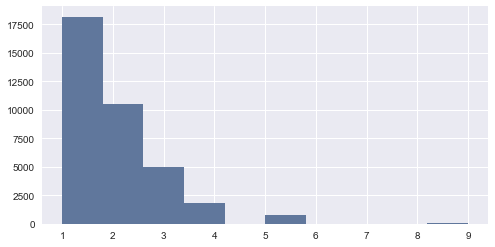

In [118]:
sns.plt.hist(a.n1q33C)

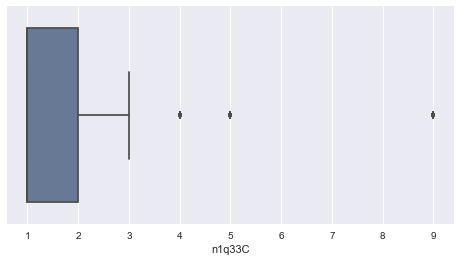

In [119]:
sns.boxplot(a.n1q33C)

In [120]:
#a.N1F23b.fillna(#zero or mean or median)
a.N1F23B.fillna(0)
#a.N1F23B

CASEID
NHAS00000010    0.0
NHAS00000020    0.0
NHAS00000030    0.0
NHAS00000040    0.0
NHAS00000050    0.0
NHAS00000060    0.0
NHAS00000070    0.0
NHAS00000080    0.0
NHAS00000090    0.0
NHAS00000100    0.0
NHAS00000110    0.0
NHAS00000120    0.0
NHAS00000130    0.0
NHAS00000140    0.0
NHAS00000150    1.0
NHAS00000160    0.0
NHAS00000170    0.0
NHAS00000180    0.0
NHAS00000190    0.0
NHAS00000200    0.0
NHAS00000210    0.0
NHAS00000220    0.0
NHAS00000230    0.0
NHAS00000240    0.0
NHAS00000250    0.0
NHAS00000260    0.0
NHAS00000270    0.0
NHAS00000280    0.0
NHAS00000290    0.0
NHAS00000300    0.0
               ... 
NHAS01042490    0.0
NHAS01042500    0.0
NHAS01042510    0.0
NHAS01042520    0.0
NHAS01042530    0.0
NHAS01042540    0.0
NHAS01042550    0.0
NHAS01042560    0.0
NHAS01042570    1.0
NHAS01042580    0.0
NHAS01042590    0.0
NHAS01042600    0.0
NHAS01042610    0.0
NHAS01042620    0.0
NHAS01042630    0.0
NHAS01042640    0.0
NHAS01042650    0.0
NHAS01042660    0.0
NHAS01042670 

In [121]:
a.N2BQ1B1


CASEID
NHAS00000010    2.0
NHAS00000020    2.0
NHAS00000030    NaN
NHAS00000040    NaN
NHAS00000050    NaN
NHAS00000060    2.0
NHAS00000070    2.0
NHAS00000080    2.0
NHAS00000090    2.0
NHAS00000100    2.0
NHAS00000110    NaN
NHAS00000120    2.0
NHAS00000130    2.0
NHAS00000140    1.0
NHAS00000150    NaN
NHAS00000160    1.0
NHAS00000170    2.0
NHAS00000180    1.0
NHAS00000190    2.0
NHAS00000200    2.0
NHAS00000210    2.0
NHAS00000220    NaN
NHAS00000230    NaN
NHAS00000240    NaN
NHAS00000250    1.0
NHAS00000260    9.0
NHAS00000270    2.0
NHAS00000280    2.0
NHAS00000290    NaN
NHAS00000300    2.0
               ... 
NHAS01042490    2.0
NHAS01042500    NaN
NHAS01042510    2.0
NHAS01042520    2.0
NHAS01042530    2.0
NHAS01042540    NaN
NHAS01042550    NaN
NHAS01042560    NaN
NHAS01042570    2.0
NHAS01042580    NaN
NHAS01042590    2.0
NHAS01042600    2.0
NHAS01042610    2.0
NHAS01042620    2.0
NHAS01042630    2.0
NHAS01042640    2.0
NHAS01042650    NaN
NHAS01042660    NaN
NHAS01042670 

In [122]:
a.fillna(200)

,maud5,pmaud5,lmaud5,opud5,popud5,lopud5,cocud5,pcocud5,lcocud5,sedud5,...,nnbs4,nnbs5,nnbs6,nnbs7,nnbs8,nnbpcs,nnbmcs,nurban,nregion,broadptsd
CASEID,,,,,,,,,,,,,,,,,,,,,
NHAS00000010,0,0,0,0,0,0,0,0,0,0,...,55.5,47.7,36.4,39.3,52.3,52.5,41.8,1,1,0
NHAS00000020,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,46.5,44.9,40.2,52.7,38.3,1,1,0
NHAS00000030,0,0,0,0,0,0,0,0,0,0,...,55.5,27.6,56.6,56.1,40.2,59.3,41.2,1,1,0
NHAS00000040,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,39.3,46.3,58.8,45.6,1,1,0
NHAS00000050,0,0,0,0,0,0,0,0,0,0,...,44.7,57.8,36.4,44.9,34.1,54.7,37.3,1,1,0
NHAS00000060,0,0,0,0,0,0,0,0,0,0,...,55.5,57.8,56.6,33.7,46.3,61.5,42.1,1,1,0
NHAS00000070,0,0,0,0,0,0,0,0,0,0,...,44.7,37.7,56.6,56.1,40.2,53.7,44.7,1,1,0
NHAS00000080,0,0,0,0,0,0,0,0,0,0,...,62.0,57.8,56.6,56.1,58.4,54.5,58.2,1,1,0
NHAS00000090,0,0,0,0,0,0,0,0,0,0,...,44.7,47.7,26.3,22.5,28.0,39.1,29.8,1,1,0


In [123]:
a.fillna(200, inplace=True)

//anaconda/envs/tensorflow/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [124]:
a=a.fillna(200)

In [125]:
a.N2BQ1B1

CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      2.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      1.0
NHAS00000170      2.0
NHAS00000180      1.0
NHAS00000190      2.0
NHAS00000200      2.0
NHAS00000210      2.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      1.0
NHAS00000260      9.0
NHAS00000270      2.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610      2.0
NHAS01042620      2.0
NHA

In [126]:
a.N2BQ1B1


CASEID
NHAS00000010      2.0
NHAS00000020      2.0
NHAS00000030    200.0
NHAS00000040    200.0
NHAS00000050    200.0
NHAS00000060      2.0
NHAS00000070      2.0
NHAS00000080      2.0
NHAS00000090      2.0
NHAS00000100      2.0
NHAS00000110    200.0
NHAS00000120      2.0
NHAS00000130      2.0
NHAS00000140      1.0
NHAS00000150    200.0
NHAS00000160      1.0
NHAS00000170      2.0
NHAS00000180      1.0
NHAS00000190      2.0
NHAS00000200      2.0
NHAS00000210      2.0
NHAS00000220    200.0
NHAS00000230    200.0
NHAS00000240    200.0
NHAS00000250      1.0
NHAS00000260      9.0
NHAS00000270      2.0
NHAS00000280      2.0
NHAS00000290    200.0
NHAS00000300      2.0
                ...  
NHAS01042490      2.0
NHAS01042500    200.0
NHAS01042510      2.0
NHAS01042520      2.0
NHAS01042530      2.0
NHAS01042540    200.0
NHAS01042550    200.0
NHAS01042560    200.0
NHAS01042570      2.0
NHAS01042580    200.0
NHAS01042590      2.0
NHAS01042600      2.0
NHAS01042610      2.0
NHAS01042620      2.0
NHA

In [127]:
#import AMP customer data
b = pd.read_csv("/Users/doronsamuell/Desktop/AMPExisting.csv", low_memory=False)

In [128]:
print(b.shape)

(37548, 16)


In [129]:
print(b.describe())

             Income        Weight        Height           BMI           Age  \
count  3.726500e+04  37400.000000  37399.000000  37399.000000  37292.000000   
mean   8.213987e+04     80.614706    173.771331     26.658782     39.613402   
std    1.640837e+05     16.623823     10.024085      4.576886      9.114113   
min    0.000000e+00     10.000000    100.000000      3.000000     14.000000   
25%    4.200000e+04     69.000000    167.000000     23.700000     33.000000   
50%    6.500000e+04     80.000000    175.000000     26.100000     40.000000   
75%    1.000000e+05     90.000000    180.000000     29.100000     46.000000   
max    1.972000e+07    300.000000    218.000000     93.500000     69.000000   

       AlcoholQtyWeekly  WorkHoursPerWeek  
count      34222.000000      25581.000000  
mean           3.233497         42.785818  
std            4.840748         13.735699  
min            0.000000          0.000000  
25%            0.460000         38.000000  
50%            2.000000 

In [130]:
%%time
b = b.set_index(['ID'])
b

CPU times: user 4.6 ms, sys: 2.84 ms, total: 7.43 ms
Wall time: 6.56 ms


In [131]:
b

,MY,Income,Gender,Weight,Height,BMI,Age,SmokerEver,AlcoholQtyWeekly,ConsumeAlcohol,Smoker,Mental,Drugs,WorkHoursPerWeek,EmploymentStatus
ID,,,,,,,,,,,,,,,
I005165460,11-Dec,68000.0,Female,60.0,170.0,20.8,25.0,No,9.00,Yes,No,N,N,40.0,Employee (full time or permanent part-time)
I019097150,11-Dec,180000.0,Female,120.0,171.0,41.0,32.0,Yes,2.30,Yes,Yes,N,N,50.0,Employee (full time or permanent part-time)
I033297108,11-Dec,100000.0,Male,90.0,182.0,27.2,38.0,Yes,15.00,Yes,No,N,N,35.0,Employee (full time or permanent part-time)
I041405423,11-Dec,71000.0,Male,110.0,180.0,34.0,40.0,Yes,5.00,Yes,No,N,N,50.0,Employee (full time or permanent part-time)
I042943940,11-Dec,250000.0,Male,85.0,179.0,26.5,50.0,No,6.00,Yes,No,N,N,40.0,Self-employed
I078115625,11-Dec,30000.0,Male,63.0,164.0,23.4,50.0,No,1.00,Yes,No,N,N,40.0,Self-employed
I080716715,11-Dec,0.0,Female,60.0,170.0,20.8,35.0,No,2.00,Yes,No,N,N,NaN,Full time home duties (care and maintenance of...
I105884573,11-Dec,0.0,Female,75.0,156.0,30.8,31.0,Yes,5.00,Yes,Yes,N,N,NaN,Full time home duties (care and maintenance of...
I185267409,11-Dec,180000.0,Male,78.0,175.0,25.5,54.0,No,3.00,Yes,No,N,N,40.0,Employee (full time or permanent part-time)


In [132]:
# sns.boxplot(b.Weight)

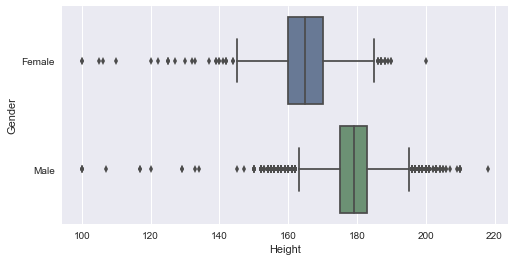

In [133]:
sns.boxplot(b.Height, b.Gender)

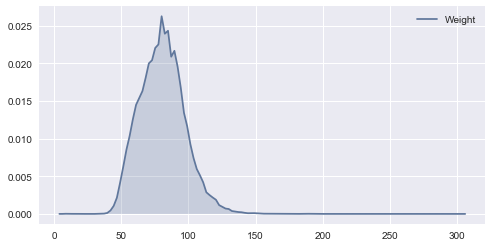

In [134]:
sns.kdeplot(b.Weight, shade=True)

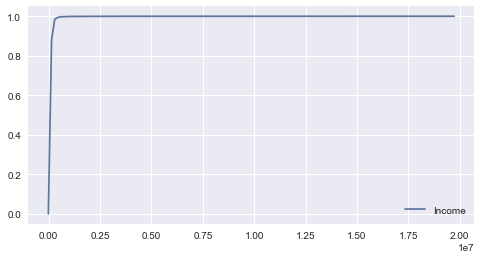

In [135]:
sns.kdeplot(b.Income.dropna(), cumulative=True)

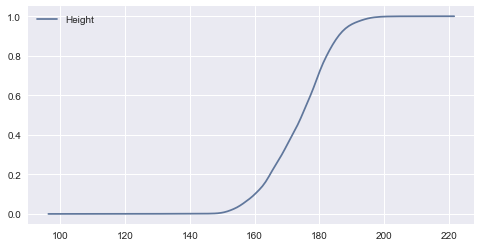

In [136]:
sns.kdeplot(b.Height.dropna(), cumulative=True)

In [157]:
%%time
# Split-out validation dataset
dataset = a
#array = dataset.values
#X = array[:,0:4052]
#Y = array[:,4052]

to_drop = ["broadptsd"]
X = a.drop(to_drop, axis=1)
label = "broadptsd"
Y = a.broadptsd


validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

SyntaxError: invalid character in identifier (<unknown>, line 10)

In [138]:
print(array)

[[ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  2.  2.  0.]
 [ 0.  0.  0. ...,  2.  2.  0.]
 [ 0.  0.  0. ...,  2.  2.  0.]]


In [139]:
%%time
# ML algorithms

dataframe = a
#to_drop = ["broadptsd", "condition2" ... ]
to_drop = ["broadptsd"]
a.drop(to_drop, axis=1)

#names = a.columns.values
#array = dataframe.values

X = a.drop(to_drop, axis=1)
label = "broadptsd"
Y = a.broadptsd.values

seed = 7
num_trees = 100
max_features = 20
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

SyntaxError: invalid character in identifier (<unknown>, line 13)

In [ ]:
print(__doc__)


# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [142]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
## Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'y_test' is not defined

In [ ]:
a.to_csv(path_or_buf = '/Users/doronsamuell/Desktop/updated.csv')

In [ ]:
print(a.shape)

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [ ]:
a

In [ ]:
a.N2BQ1B1

In [ ]:
a=a.fillna(200)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))